In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [73]:
df = sns.load_dataset("titanic")

In [74]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [75]:
##Initial Analysis of Datasets

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [77]:
df.drop(["embarked","class","alive"], axis=1, inplace=True)

In [78]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


In [79]:
##Exploratory Data Analysis EDA

In [80]:
#missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [81]:
null_num=[]
for i in df.columns:
    x=df[i].isnull().sum()
    null_num.append(x)

In [82]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [83]:
pd.DataFrame(null_num, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

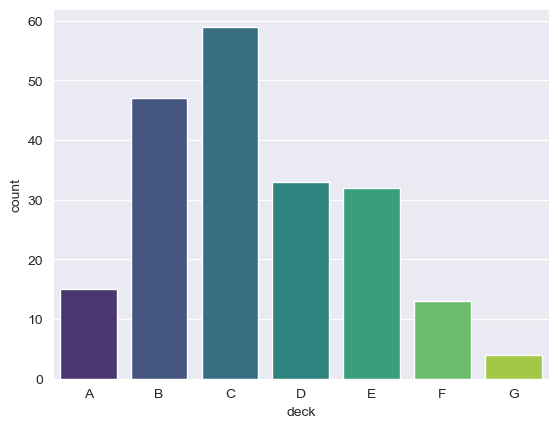

In [84]:
sns.set_style("darkgrid")
sns.countplot(x="deck",data=df, palette="viridis")

<Axes: xlabel='deck', ylabel='count'>

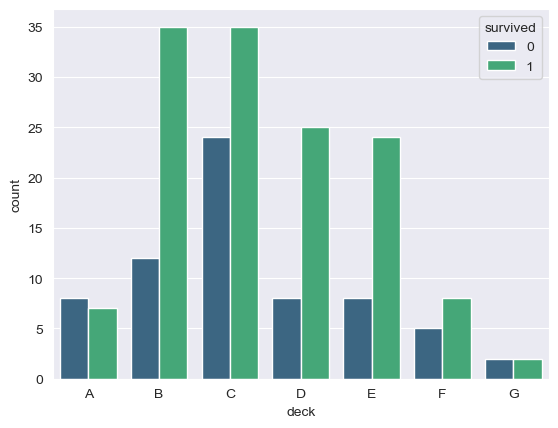

In [85]:
sns.set_style("darkgrid")
sns.countplot(x="deck", hue ="survived", data=df, palette="viridis")

In [86]:
df.drop(["deck"], axis=1, inplace = True)

In [87]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

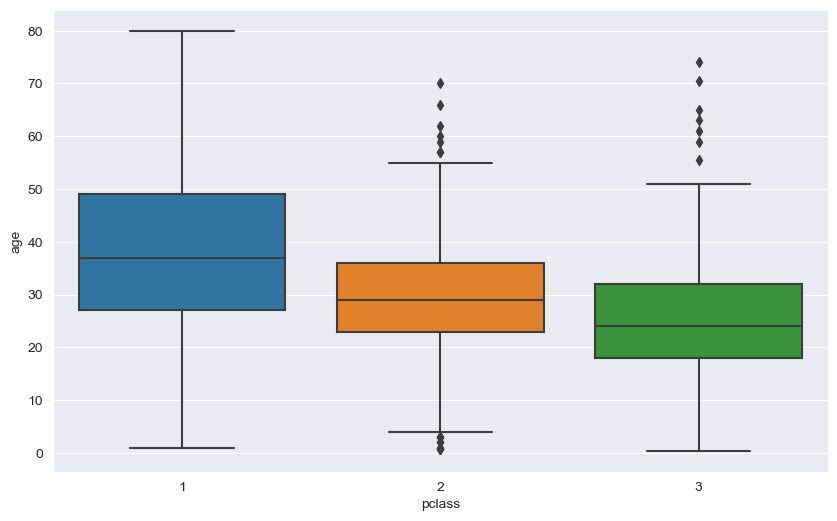

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(x="pclass", y="age", data=df)

In [89]:
def fillna_age(columns):
    age=columns[0]
    pclass=columns[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return 38
        
        elif pclass==2:
            return 29
        
        else:
            return 23
    else:
        return age

In [90]:
df.age=df[["age","pclass"]].apply(fillna_age, axis=1)

In [91]:
null_num=[]
for i in df.columns:
    x=df[i].isnull().sum()
    null_num.append(x)
    
    
pd.DataFrame(null_num, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [92]:
df.dropna(inplace=True)

In [93]:
null_num=[]
for i in df.columns:
    x=df[i].isnull().sum()
    null_num.append(x)

pd.DataFrame(null_num, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

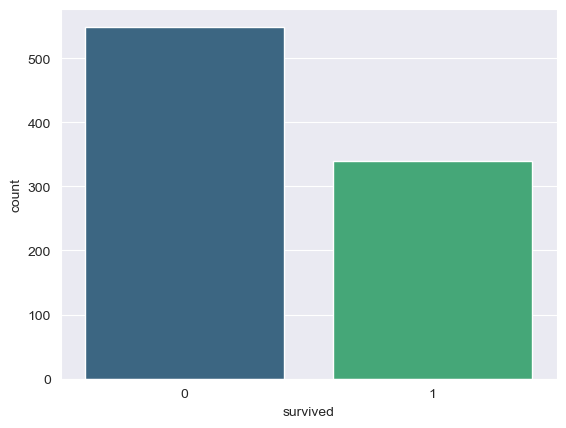

In [94]:
sns.set_style("darkgrid")
sns.countplot(x ="survived", data=df, palette="viridis")

In [95]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

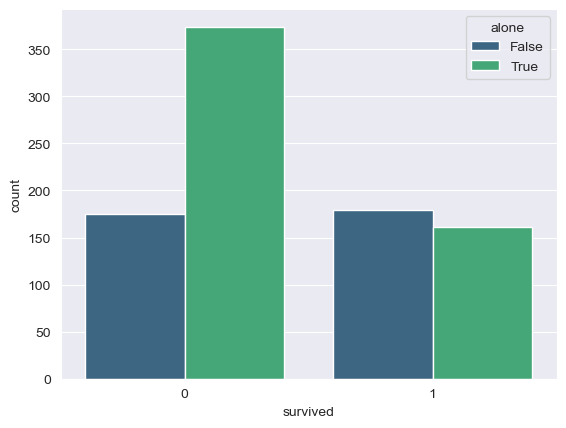

In [96]:
sns.set_style("darkgrid")
sns.countplot(x ="survived", hue ="alone", data=df, palette="viridis")

<Axes: xlabel='survived', ylabel='count'>

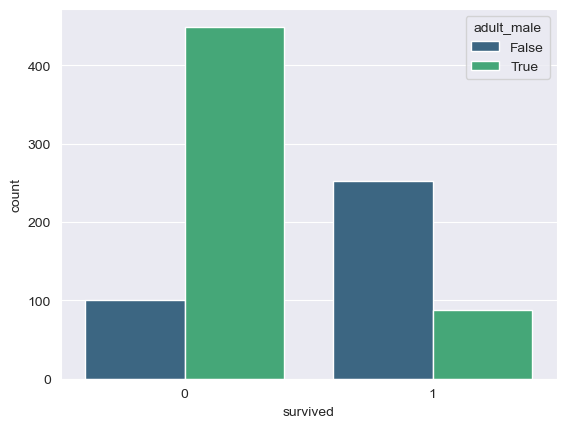

In [97]:
sns.set_style("darkgrid")
sns.countplot(x ="survived", hue ="adult_male", data=df, palette="viridis")

<Axes: xlabel='survived', ylabel='count'>

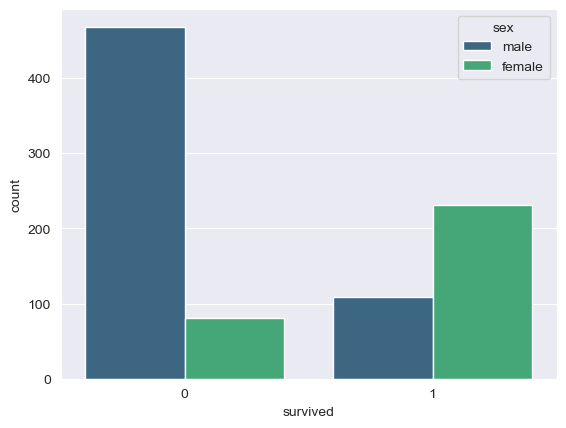

In [98]:
sns.set_style("darkgrid")
sns.countplot(x ="survived", hue ="sex", data=df, palette="viridis")

<Axes: xlabel='survived', ylabel='count'>

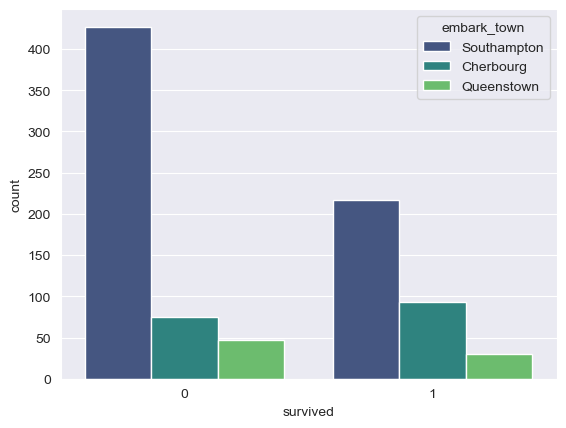

In [99]:
sns.set_style("darkgrid")
sns.countplot(x ="survived", hue ="embark_town", data=df, palette="viridis")

In [100]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

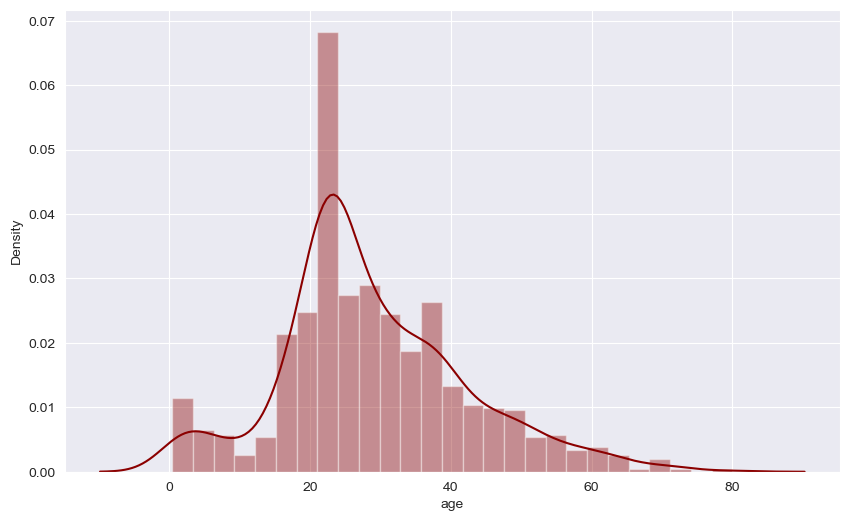

In [101]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"], color="darkred")

<Axes: xlabel='fare', ylabel='Density'>

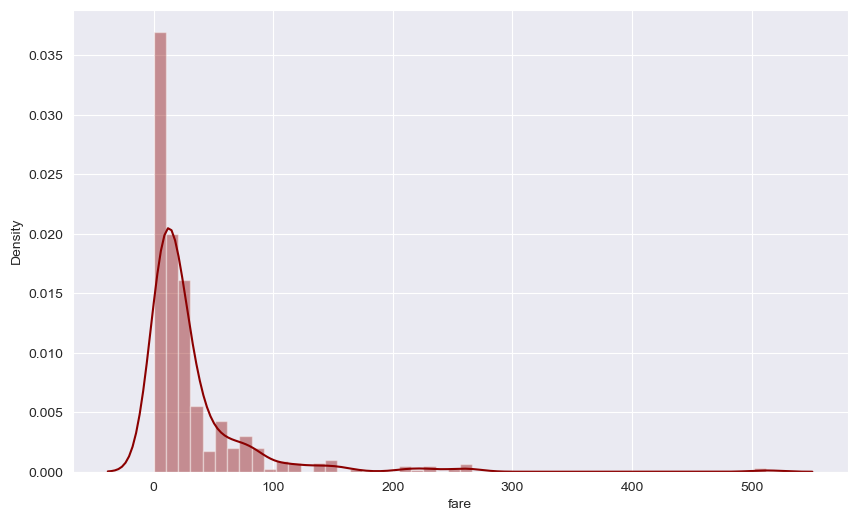

In [102]:
plt.figure(figsize=(10,6))
sns.distplot(df["fare"], color="darkred")

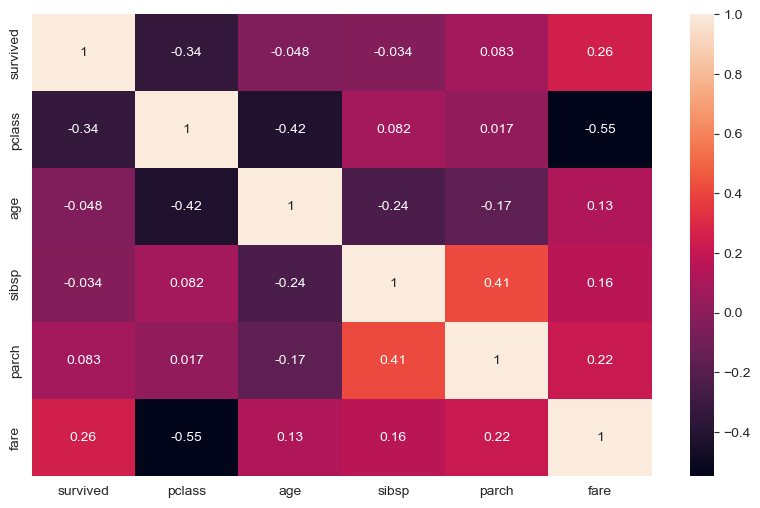

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [104]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [105]:
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)

In [106]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,1,Southampton,0
1,1,1,female,38.0,1,0,71.2833,woman,0,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,woman,0,Southampton,1
3,1,1,female,35.0,1,0,53.1000,woman,0,Southampton,0
4,0,3,male,35.0,0,0,8.0500,man,1,Southampton,1


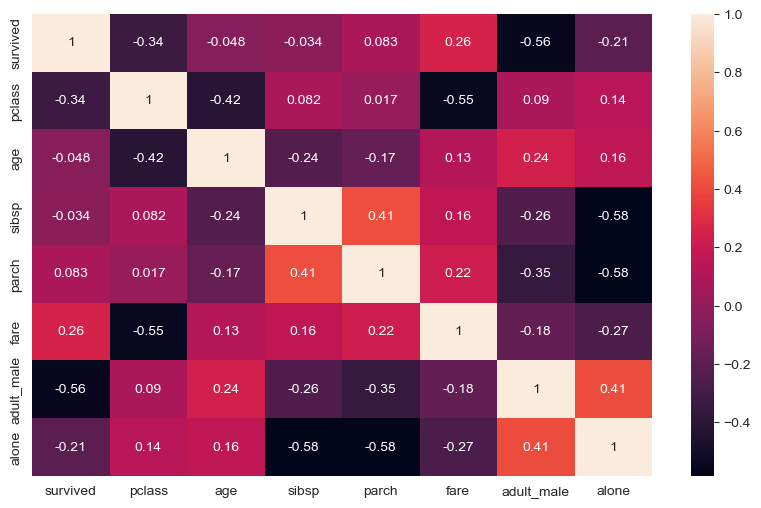

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)
plt.show()

In [108]:
df.drop(["age","sibsp","parch"], axis=1, inplace=True)

In [109]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,1,Southampton,0
1,1,1,female,71.2833,woman,0,Cherbourg,0
2,1,3,female,7.9250,woman,0,Southampton,1
3,1,1,female,53.1000,woman,0,Southampton,0
4,0,3,male,8.0500,man,1,Southampton,1


In [110]:
sex = pd.get_dummies(df["sex"], drop_first=True)
who = pd.get_dummies(df["who"], drop_first=True)
adult_male = pd.get_dummies(df["adult_male"], drop_first=True)
embark_town = pd.get_dummies(df["embark_town"], drop_first=True)
alone = pd.get_dummies(df["alone"], drop_first=True)

In [111]:
df = pd.concat([df,sex, who, adult_male, embark_town, alone],axis=1)

In [112]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,1,Queenstown,Southampton,1
0,0,3,male,7.2500,man,1,Southampton,0,True,True,False,True,False,True,False
1,1,1,female,71.2833,woman,0,Cherbourg,0,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,0,Southampton,1,False,False,True,False,False,True,True
3,1,1,female,53.1000,woman,0,Southampton,0,False,False,True,False,False,True,False
4,0,3,male,8.0500,man,1,Southampton,1,True,True,False,True,False,True,True


In [113]:
df.drop(["sex", "who", "adult_male", "embark_town", "alone"],axis=1, inplace=True)

In [114]:
df.head()

,survived,pclass,fare,male,man,woman,1,Queenstown,Southampton,1
0,0,3,7.2500,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True


In [122]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [123]:
df.head()

,survived,pclass,fare,male,man,woman,1,Queenstown,Southampton,1
0,0,3,7.2500,1,1,0,1,0,1,0
1,1,1,71.2833,0,0,1,0,0,0,0
2,1,3,7.9250,0,0,1,0,0,1,1
3,1,1,53.1000,0,0,1,0,0,1,0
4,0,3,8.0500,1,1,0,1,0,1,1


In [125]:
#Logistic Algorithms: Modelling

In [132]:
df.columns = df.columns.astype(str)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X=df.drop(["survived"], axis=1)
Y=df["survived"]

In [135]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.25, random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lr_model=LogisticRegression()

In [138]:
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [139]:
Y_pred = lr_model.predict(X_test)

In [141]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [142]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       141
           1       0.68      0.79      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.79       223



In [143]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [144]:
cnf_matrix

array([[111,  30],
       [ 17,  65]], dtype=int64)